In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

C:\Users\smartestpersonalive\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


CUSTID : Identification of Credit Card holder (Categorical)

BALANCE : Balance amount left in their account to make purchases 

BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES : Amount of purchases made from account

ONEOFFPURCHASES : Maximum purchase amount done in one-go

INSTALLMENTSPURCHASES : Amount of purchase done in installment

CASHADVANCE : Cash in advance given by the user

PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

PURCHASESTRX : Numbe of purchase transactions made

CREDITLIMIT : Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user

MINIMUM_PAYMENTS : Minimum amount of payments made by user

PRCFULLPAYMENT : Percent of full payment paid by user

TENURE : Tenure of credit card service for user

In [3]:
bank_df = pd.read_csv("marketing_data.csv")
bank_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
# check data types
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
bank_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


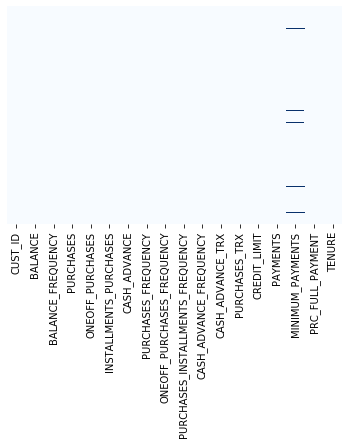

In [12]:
# Check for missing data
sns.heatmap(bank_df.isnull(), yticklabels=False,cbar=False,cmap="Blues")

In [13]:
# find where the null values are:
bank_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [16]:
# replace null values with the mean
# minimum payments column
bank_df.loc[bank_df['MINIMUM_PAYMENTS'].isnull() == True,\
            "MINIMUM_PAYMENTS"] = bank_df['MINIMUM_PAYMENTS'].mean()

# credit limit column
bank_df.loc[bank_df['CREDIT_LIMIT'].isnull() == True, \
            'CREDIT_LIMIT'] = bank_df['CREDIT_LIMIT'].mean()

In [19]:
# check if we still have null values
bank_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [20]:
# drop cust_id
bank_df.drop(columns=['CUST_ID'],axis=1,inplace=True)

In [22]:
# check if changes are made
bank_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [23]:
# generate a correlation matrix to describe relationship between variables
correlation_mtx = bank_df.corr()

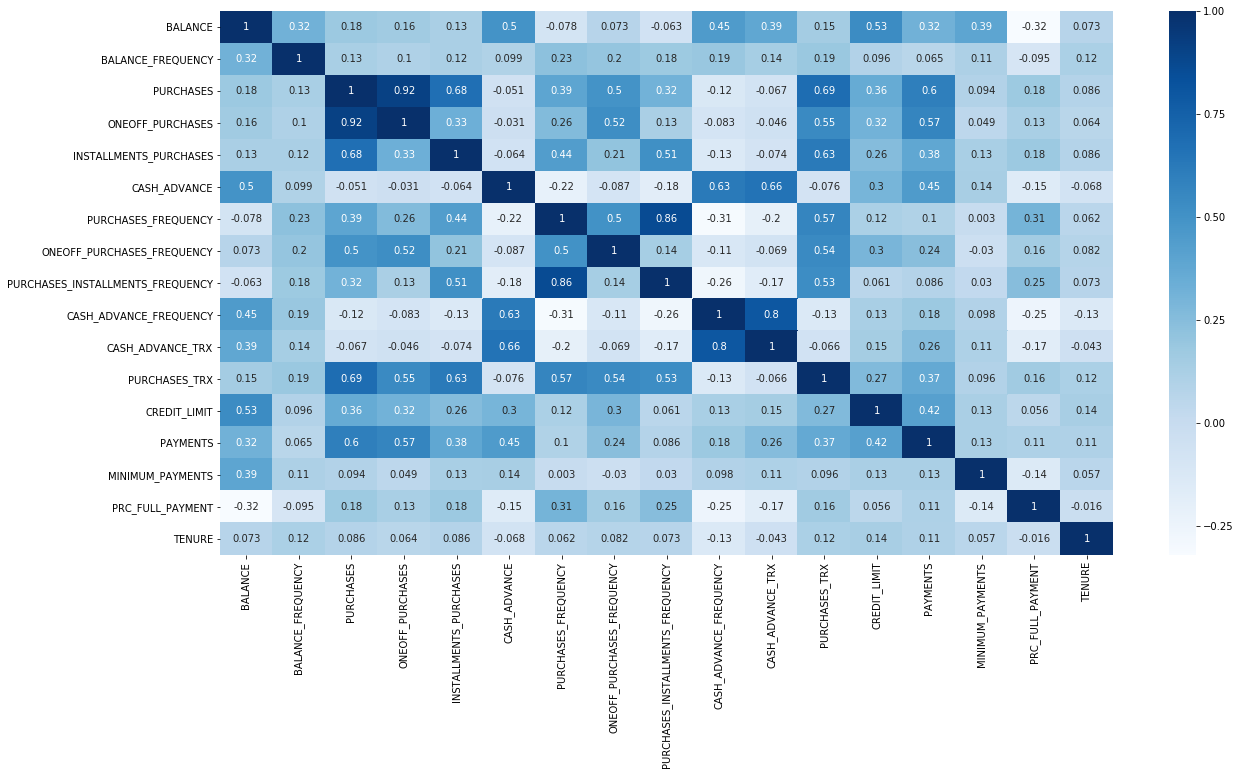

In [30]:
# create a heatmap to display relationships
plt.figure(figsize = (20,10))
# f,ax = plt.subplots(figsize=(20,10))
sns.heatmap(correlation_mtx, annot=True,cmap="Blues")


In [32]:
# normalize the data
from sklearn.preprocessing import StandardScaler

In [102]:
scaler = StandardScaler()
bank_df_scaled = scaler.fit_transform(bank_df)

In [37]:
bank_df_scaled[:4]

array([[-7.31989366e-01, -2.49434481e-01, -4.24899735e-01,
        -3.56934022e-01, -3.49078819e-01, -4.66785554e-01,
        -8.06490346e-01, -6.78660808e-01, -7.07313165e-01,
        -6.75348858e-01, -4.76069817e-01, -5.11333250e-01,
        -9.60433344e-01, -5.28978791e-01, -3.10967549e-01,
        -5.25550971e-01,  3.60679544e-01],
       [ 7.86960853e-01,  1.34324671e-01, -4.69551882e-01,
        -3.56934022e-01, -4.54576230e-01,  2.60560451e+00,
        -1.22175806e+00, -6.78660808e-01, -9.16995191e-01,
         5.73962722e-01,  1.10073852e-01, -5.91795877e-01,
         6.88639034e-01,  8.18642127e-01,  8.93102090e-02,
         2.34226897e-01,  3.60679544e-01],
       [ 4.47135132e-01,  5.18083823e-01, -1.07668230e-01,
         1.08888513e-01, -4.54576230e-01, -4.66785554e-01,
         1.26984323e+00,  2.67345108e+00, -9.16995191e-01,
        -6.75348858e-01, -4.76069817e-01, -1.09020117e-01,
         8.26061732e-01, -3.83804738e-01, -1.01663181e-01,
        -5.25550971e-01,  3.6

In [75]:
from sklearn import metrics
from sklearn.metrics import silhouette_score

In [79]:
# find the best k value to use. test 19 numbers using the elbow method

kmeans_list = []
for i in range(2,20):
    kmeans = KMeans(n_clusters=i).fit(bank_df_scaled)
    kmeans_list.append(kmeans.inertia_)


([<matplotlib.axis.XTick at 0x2209b732d88>,
 <a list of 20 Text xticklabel objects>)

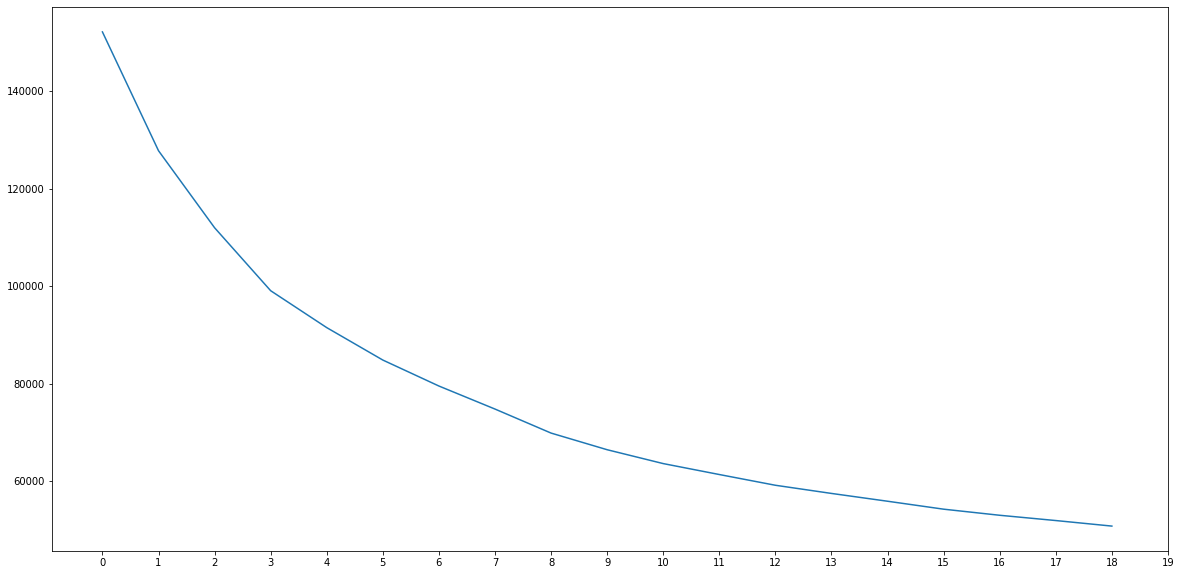

In [64]:
plt.figure(figsize = (20,10))
plt.plot(kmeans_list)
plt.xticks(ticks=(np.arange(20)))


the third cluster seems to form the elbow of the curve but it doesn't reduce linearly until the 8th cluster so I choose k=8

In [83]:
# apply the k-means method
kmeans = KMeans(8)
kmeans.fit(bank_df_scaled)
# labels (clusters) associated to each data point
labels = kmeans.labels_

In [93]:
# centroids for all clusters
cluster_centers = kmeans.cluster_centers_

In [94]:
bank_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [123]:
centroids = pd.DataFrame(data = cluster_centers, columns = [bank_df.columns])
centroids.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.336050,-0.347078,-0.289267,-0.215966,-0.286835,0.068284,-0.203078,-0.288661,-0.224549,0.308663,0.000996,-0.388117,-0.567159,-0.392680,-0.209145,0.014011,-3.203733
1,1.698325,0.393098,-0.215463,-0.154529,-0.225632,2.025668,-0.471452,-0.210500,-0.409161,1.920837,1.941432,-0.263115,1.040171,0.828342,0.557352,-0.392330,0.071341
2,0.901817,0.466986,2.270963,1.756936,2.141920,-0.195512,1.158629,1.583889,1.226198,-0.312181,-0.212097,2.781452,1.238947,1.290295,0.441655,0.304778,0.334182
3,-0.364387,0.333522,-0.036963,-0.244149,0.360956,-0.363619,0.991355,-0.386657,1.206719,-0.475345,-0.361168,0.188172,-0.259145,-0.215973,-0.032490,0.314266,0.257586
4,-0.701229,-2.144116,-0.311099,-0.235720,-0.302414,-0.321905,-0.556586,-0.444989,-0.439730,-0.520844,-0.376103,-0.419790,-0.177161,-0.202048,-0.256658,0.281550,0.199199


In [124]:
bank_df['BALANCE'].max()

19043.13856

In [125]:
# inverse transformation to gain a better understanding of the numbers
# this outs an array
centroids = scaler.inverse_transform(centroids)
# put the array back into a dataframe

centroids = pd.DataFrame(data = centroids, columns = [bank_df.columns])
centroids

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,865.015978,0.795051,385.181720,233.977974,151.686061,1122.064941,0.408846,0.116344,0.275196,0.196911,3.255627,5.062701,2430.891398,596.373827,376.802926,0.157813,7.229904
1,5099.393953,0.970392,542.864477,335.950907,207.031791,5226.790667,0.301134,0.139661,0.201826,0.519523,16.497674,8.169767,8279.016913,4131.114001,2163.092995,0.038965,11.612791
2,3441.530986,0.987896,5855.151608,3508.591111,2347.978936,568.874079,0.955365,0.674962,0.851760,0.072674,1.801418,83.846336,9002.245863,5468.421612,1893.464949,0.242857,11.964539
3,806.034585,0.956279,924.232605,187.200476,737.475444,216.344258,0.888229,0.087111,0.844018,0.040023,0.784119,19.387097,3551.573301,1107.923060,788.489699,0.245632,11.862035
4,104.925267,0.369349,338.537483,201.190254,137.598754,303.821813,0.266966,0.069709,0.189677,0.030918,0.682203,4.275424,3849.863936,1148.234177,266.075424,0.236063,11.783898
5,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
6,1219.788267,0.970151,1972.272852,1577.962477,394.310375,278.892154,0.869128,0.763277,0.399570,0.053615,1.042962,27.728519,5847.145588,1981.383343,485.190676,0.272813,11.866545
7,1604.302726,0.972794,230.117781,182.398265,47.901056,796.765070,0.142442,0.079966,0.063242,0.158198,3.105649,2.614087,3383.076547,1014.090763,844.187585,0.020189,11.881145


In [146]:
print(labels.shape)
print(labels.max())
print(labels.min())
print(bank_df.shape)

(8950,)
7
0
(8950, 17)


In [137]:
# create a datafre for labels before concatenating to the bank_df dataframe
labels_df = pd.DataFrame({"cluster": labels})
labels_df

,cluster
0,7
1,1
2,6
3,7
4,7
...,...
8945,0
8946,0
8947,0
8948,0


In [151]:
bank_cluster = []

In [152]:
# concatenate cluster labels to the centroid dataframe
bank_cluster = pd.concat([bank_df, labels_df],axis=1)
bank_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,6
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,7
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


In [153]:
y_kmeans = kmeans.fit_predict(bank_df_scaled)
y_kmeans

array([1, 4, 2, ..., 3, 3, 3])

In [159]:
list(range(8))

[0, 1, 2, 3, 4, 5, 6, 7]

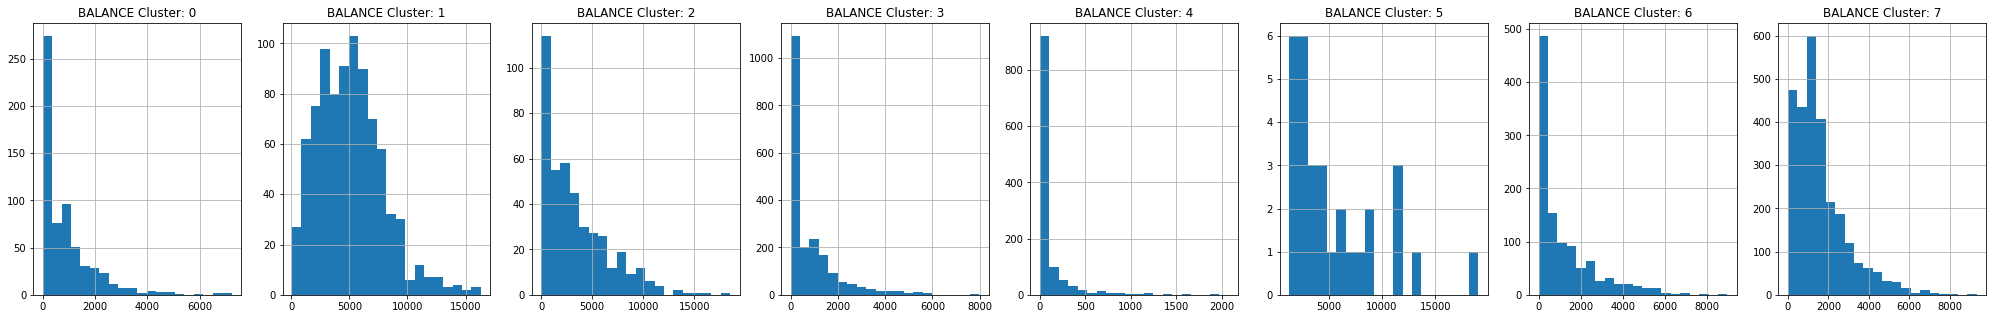

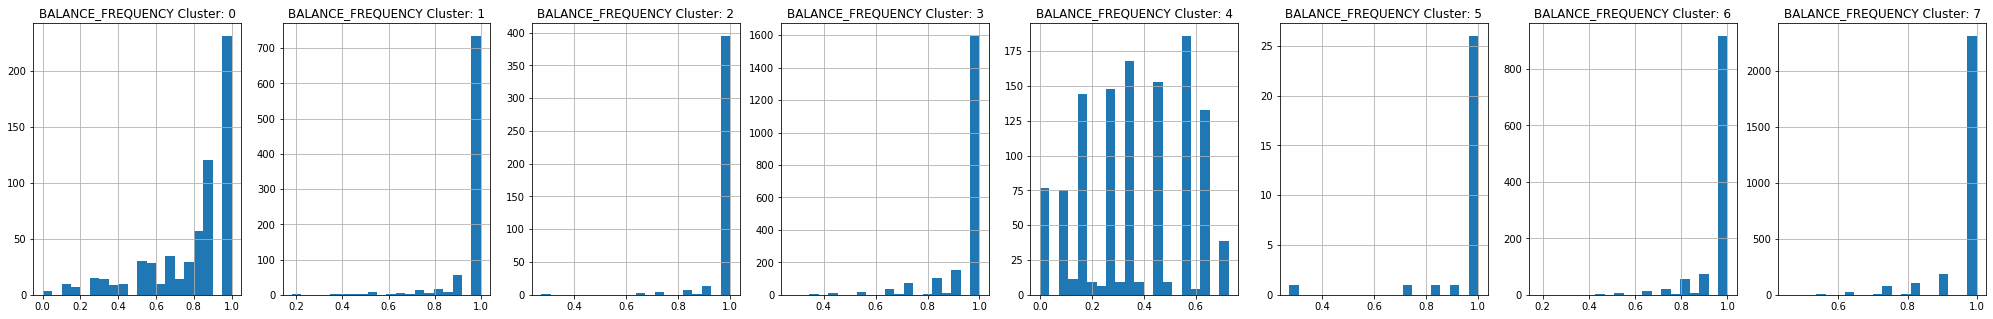

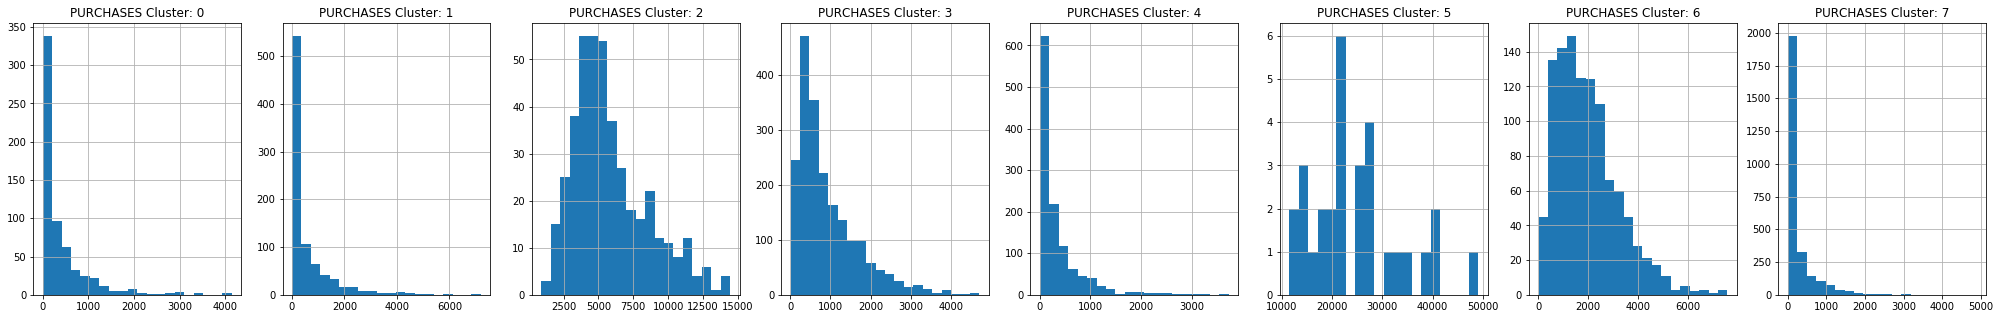

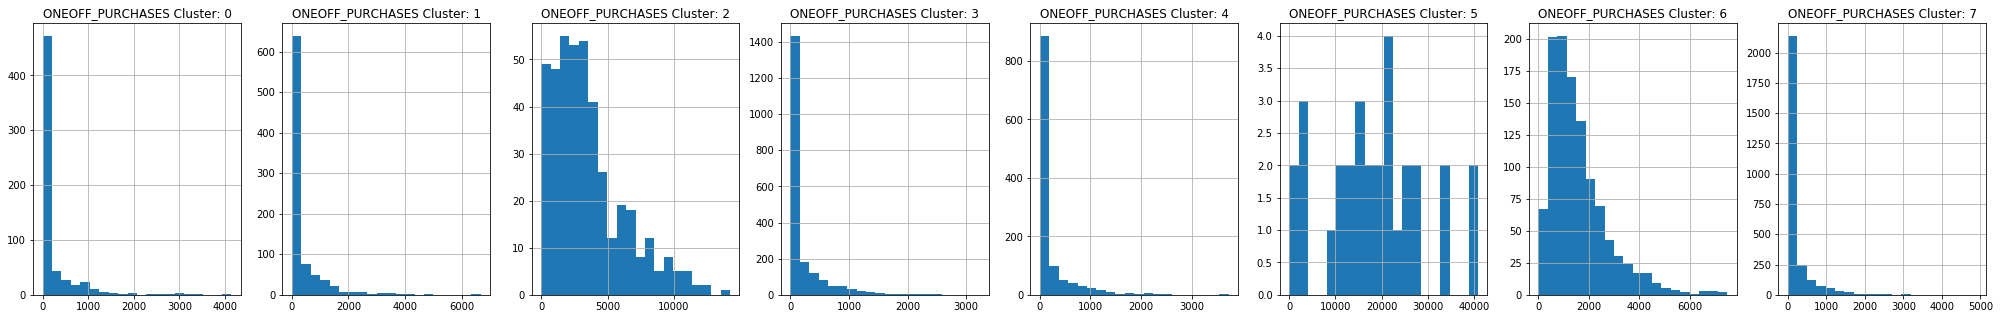

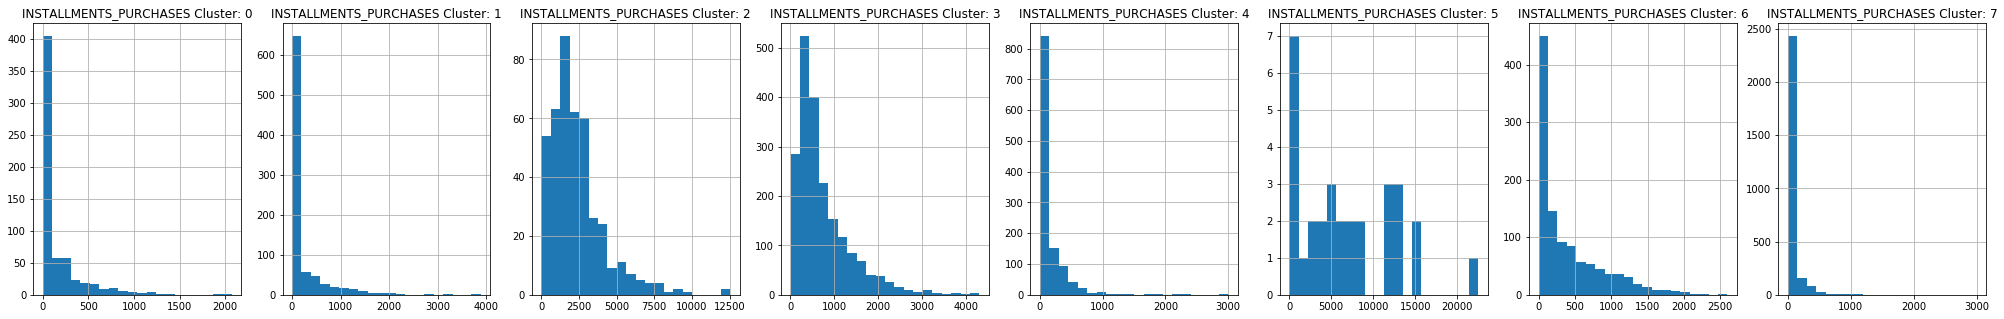

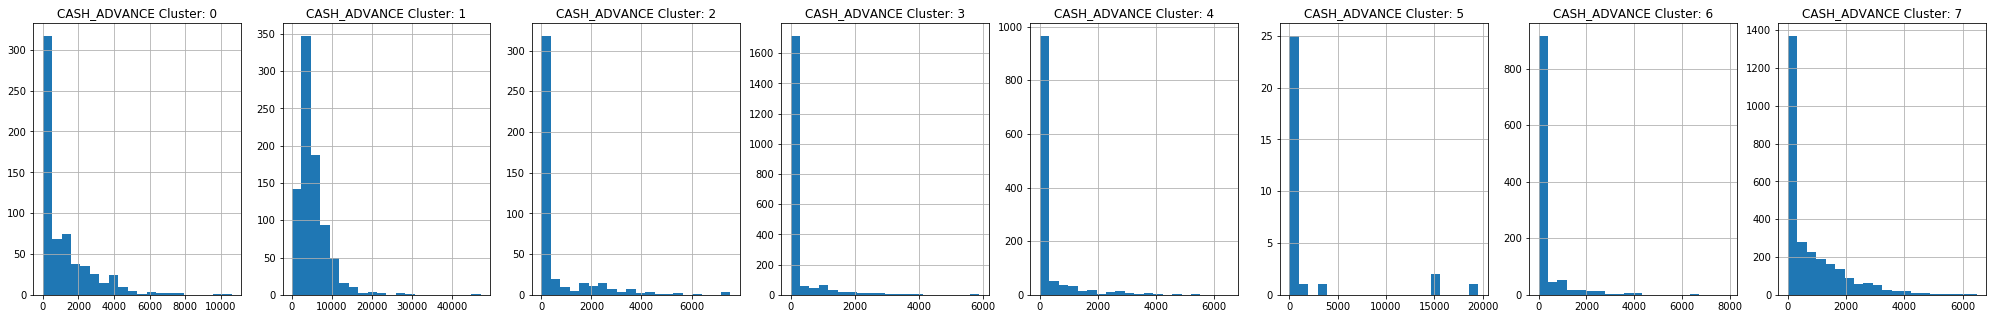

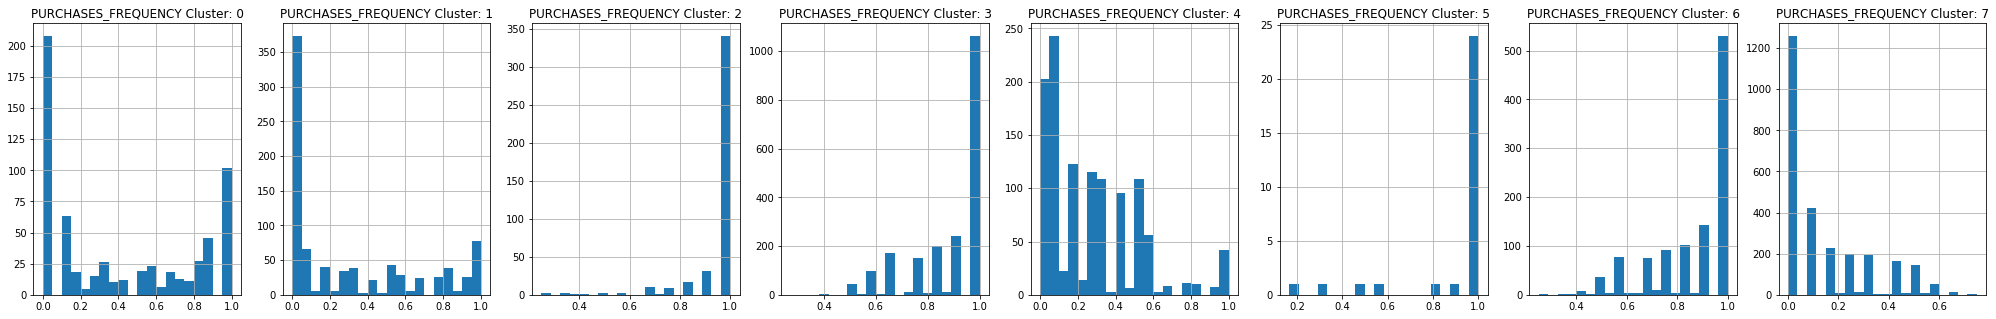

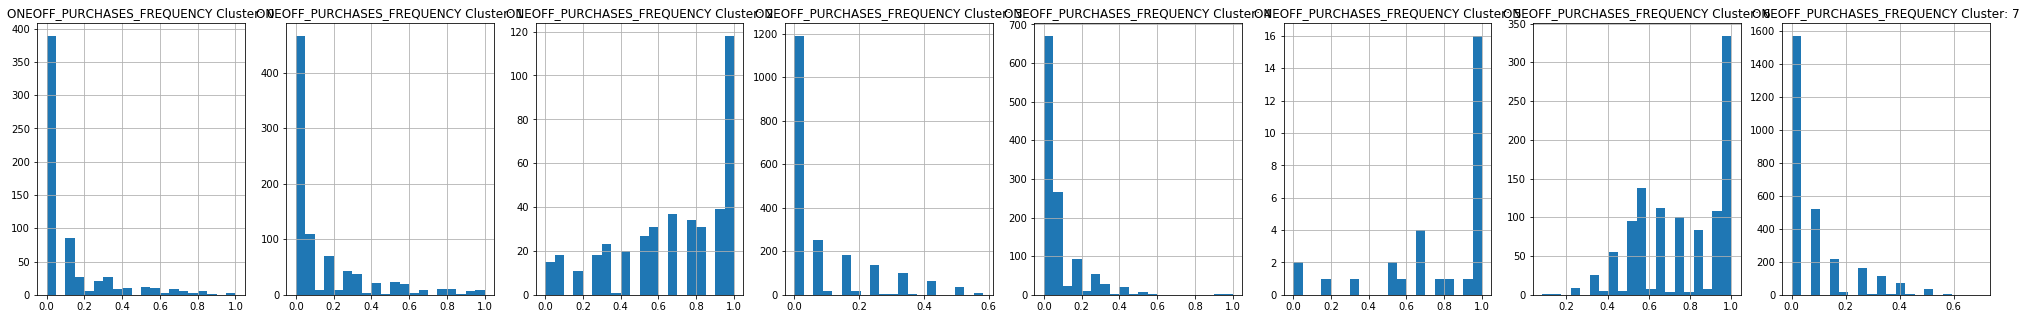

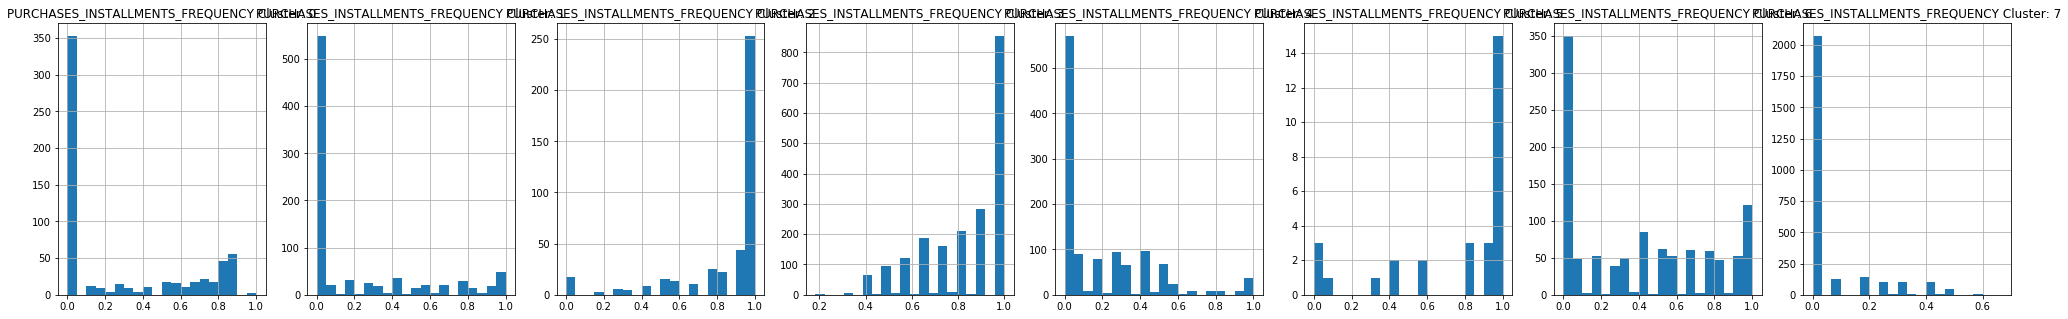

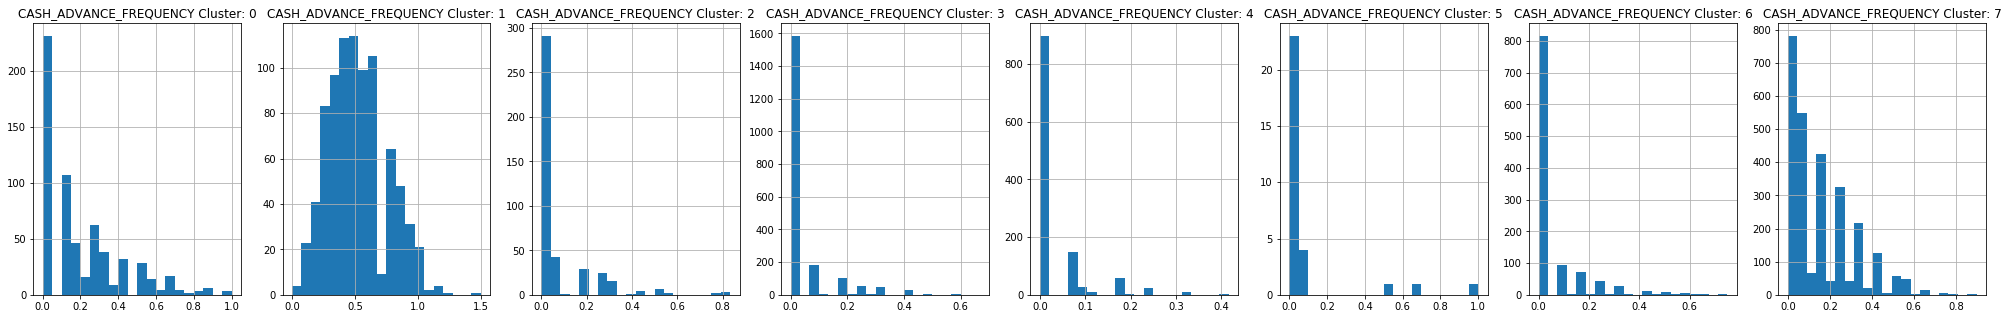

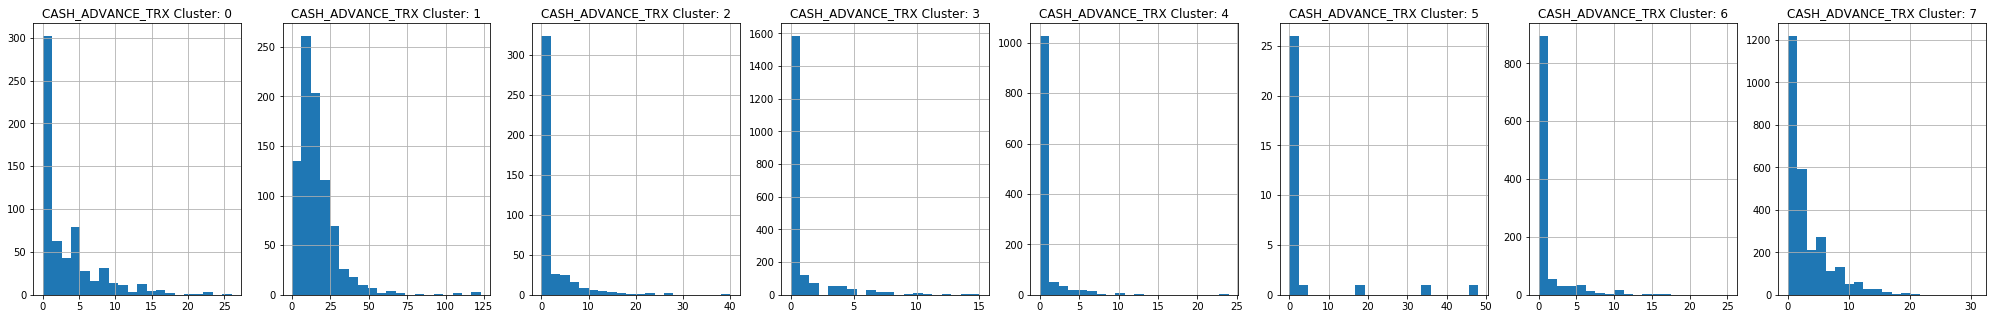

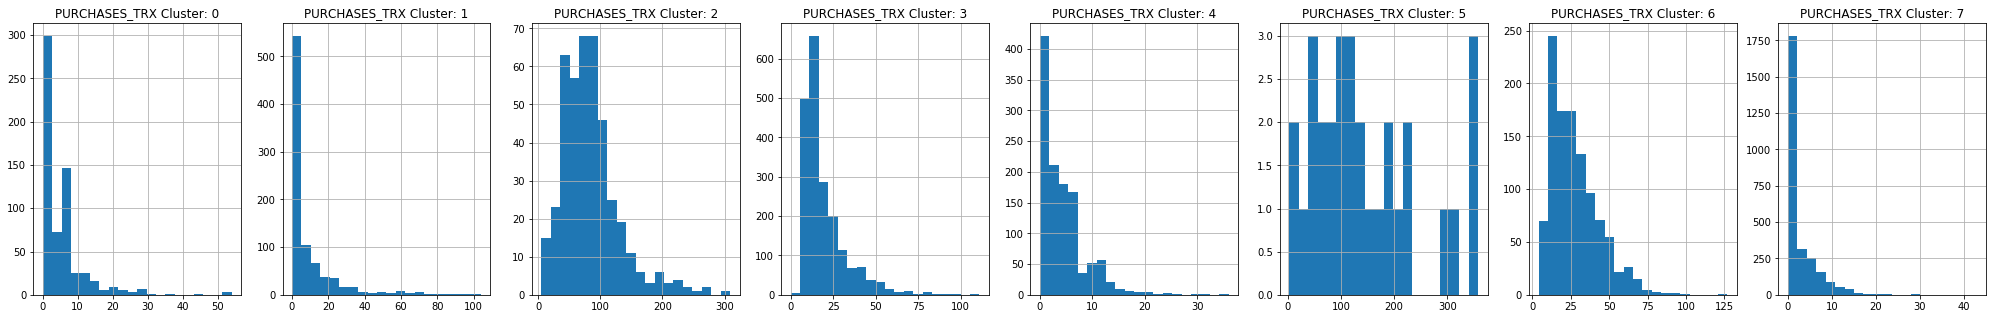

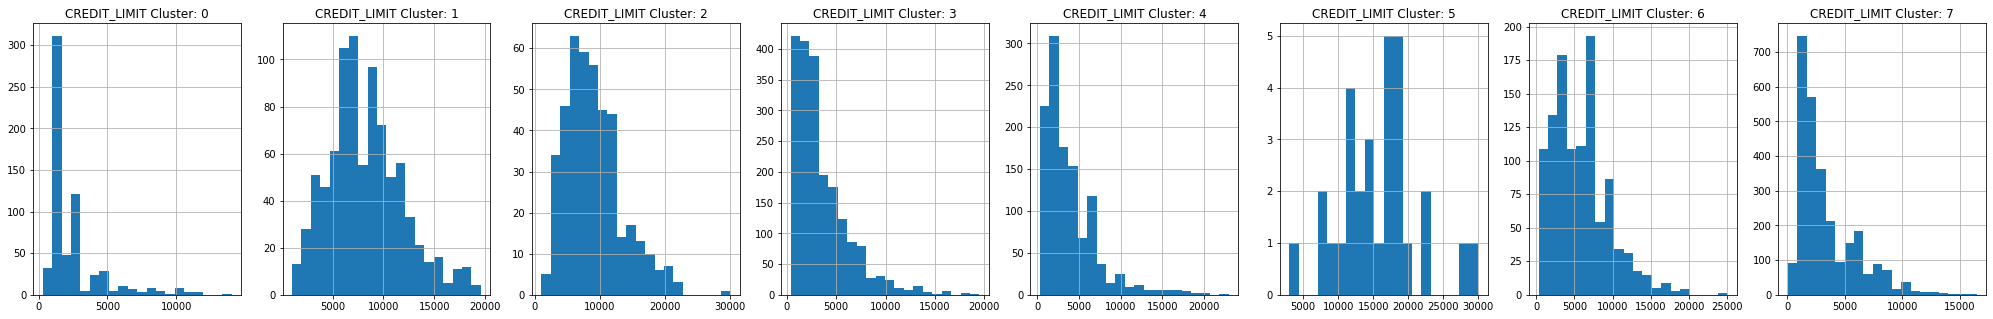

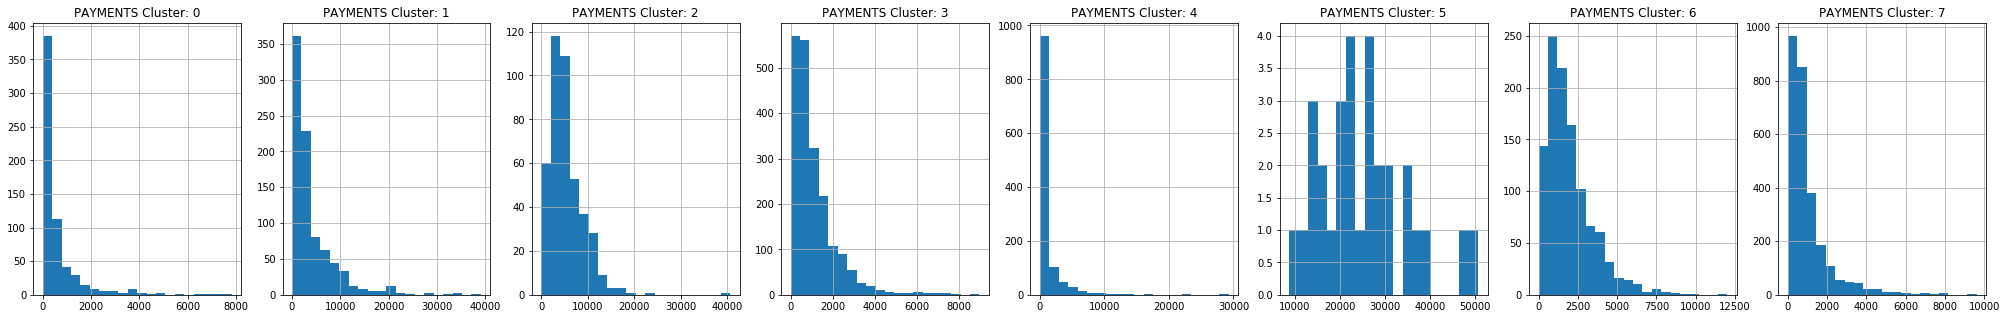

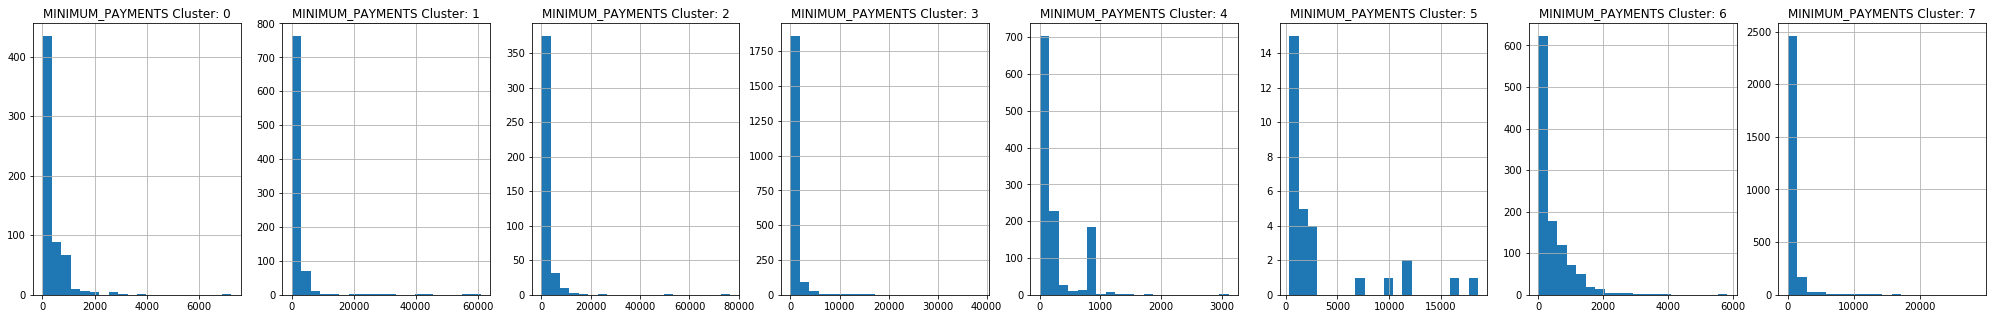

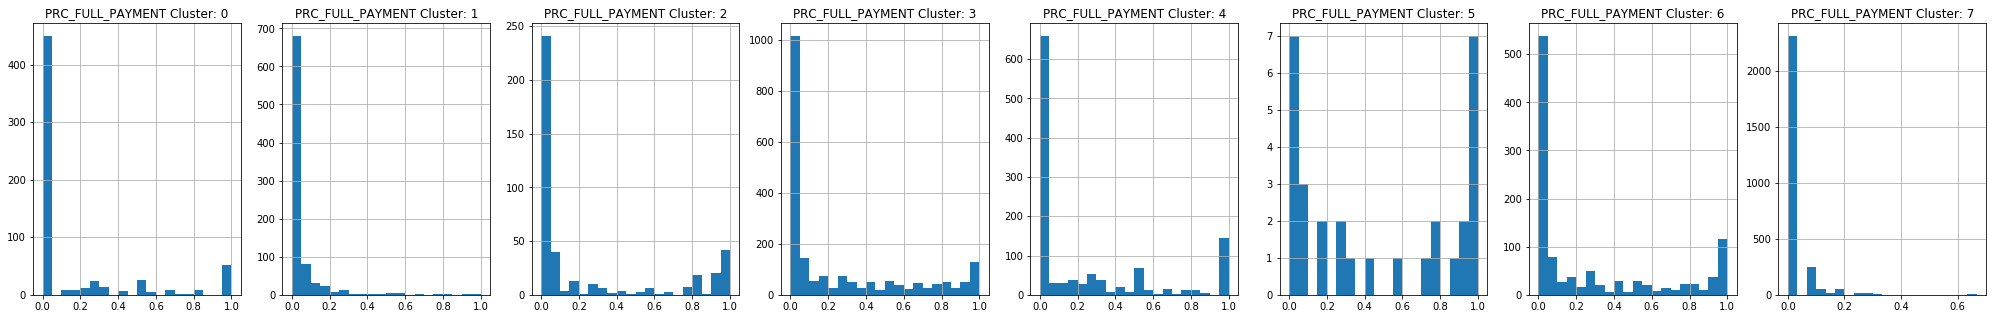

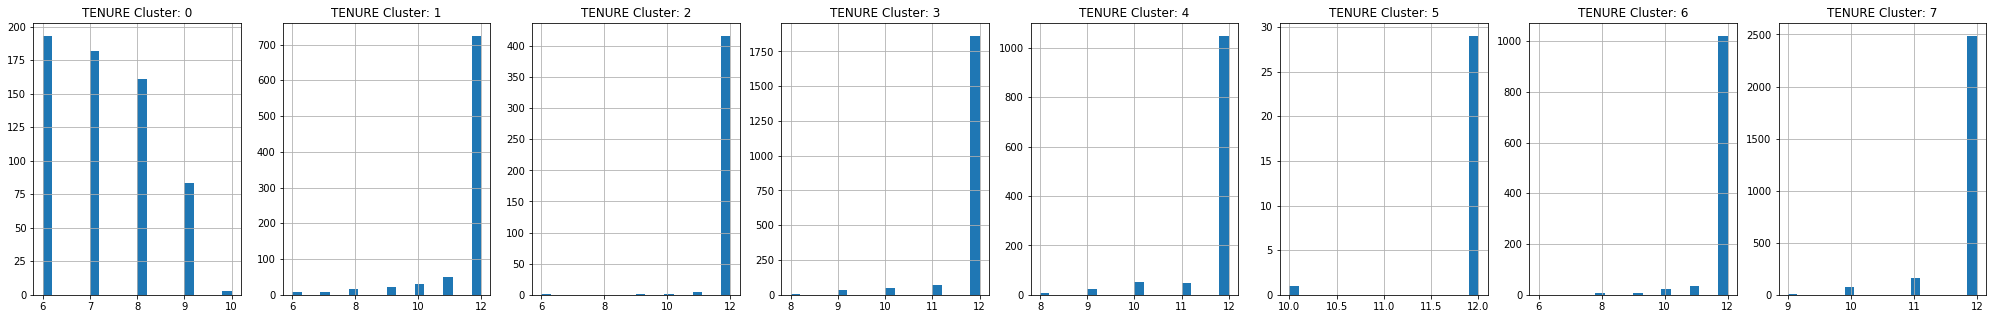

In [162]:
# visualize the behaviors of customers from each cluster
for makingbank in bank_df.columns:
    plt.figure(figsize= (35,5))
    for j in range(8):
        plt.subplot(1,8,j+1)
        cluster =  bank_cluster[bank_cluster['cluster'] == j]
        cluster[makingbank].hist(bins=20)
        plt.title(f"{makingbank} Cluster: {j}")

In [163]:
# Principal Components analysis
# converting the 17 features dataframe into 2 components
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(bank_df_scaled)

In [164]:
pca_df = pd.DataFrame(data=principal_comp, columns=['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076449
1,-1.138292,2.506469
2,0.969682,-0.383503
3,-0.873627,0.043165
4,-1.599434,-0.688579


In [166]:
# concatenate cluster labels to the pca dataframe
pca_df = pd.concat([pca_df,labels_df],axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076449,7
1,-1.138292,2.506469,1
2,0.969682,-0.383503,6
3,-0.873627,0.043165,7
4,-1.599434,-0.688579,7


In [171]:
labels_df['cluster'].unique()

array([7, 1, 6, 3, 2, 4, 0, 5])

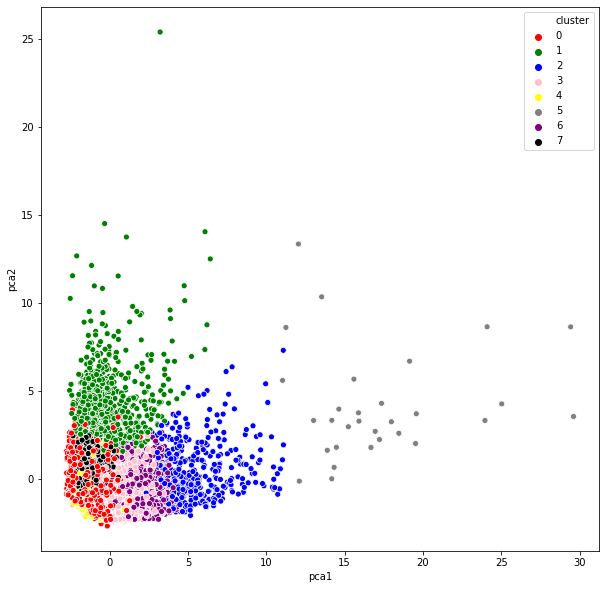

In [172]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='pca1',y='pca2',hue='cluster',data=pca_df,palette =['red','green','blue','pink','yellow','gray','purple', 'black'])